**TRATAMIENTO DE SEÑALES III**

**Mini-proyecto 2: Modelos de variable latente para el reconocimiento de acciones motoras**

**Facultad de Ingeniería**

**Universidad de Antioquia**

*Alejandra Zuleta Gónzalez, Santiago Patiño Guerrero y Natalia Pérez Puentes*

*2021-2*

1. Para el sistema de Análisis Multivariado de Señales Electromiográficas obtenido en el Primer Mini-Proyecto, se debe construir un módulo de variable latente utilizando el algorítmo de PCA. La idea es proyectar la matriz característica obtenida ${\bf{X}}\in \mathbb{R}^{N\times D}$, a un espacio latente de menor dimensión $q << D$, de tal forma que los nuevos datos en este espacio sean ${\bf{Z}}\in \mathbb{R}^{N\times q}$. Seleccione diferentes configuraciones del número de componentes q y evalúe el mejor desempeño arrojado por el modelo midiendo, el accuracy y la matriz de confusión.

In [ ]:
#Librerías
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
from sklearn.naive_bayes import GaussianNB
from ipywidgets import interact

In [ ]:
%%capture
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-C0Ayr5be8yx0Zo6QtbJz0d33aZFjpZu' -O- | sed -rn 's/.confirm=([0-9A-Za-z_]+)./\1\n/p')&id=1-C0Ayr5be8yx0Zo6QtbJz0d33aZFjpZu" -O completo.csv && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-HcTOJGHeSGyTohj5dWs4RX4ldBfHymj' -O- | sed -rn 's/.confirm=([0-9A-Za-z_]+)./\1\n/p')&id=1-HcTOJGHeSGyTohj5dWs4RX4ldBfHymj" -O mejores.csv && rm -rf /tmp/cookies.txt


In [ ]:
df_completo = pd.read_csv('completo.csv') #3402x62
df_mejores = pd.read_csv('mejores.csv') #3402x19

X_completo = df_completo.iloc[:,:61]
X_mejores = df_mejores.iloc[:,:18]

y = df_mejores.iloc[:,18:19]

In [ ]:
print(X_completo[1133:1135])
#print(X_completo[1133::])

               RMS       MAE         P1         P2         P3         P4  \
1133  5.181305e-15  0.291782 -19.131184 -19.110493 -17.774695 -11.694083   
1134  3.780783e-15  0.172002 -24.755431 -24.558691 -24.301043 -18.584352   

             P5         F1     F2          F3  ...  n25_3     n75_3     n95_3  \
1133  -9.943222  66.666667  100.0   40.000000  ...  638.0 -0.069361 -0.046776   
1134 -17.873776  60.000000   40.0  113.333333  ...  856.0 -0.073436 -0.047843   

      Median_3    Mean_3     std_3     var_3     RMS_3  no_zero_cross_3  \
1133 -0.007108  0.015382 -0.027789 -0.027251  0.026495         0.000702   
1134 -0.006223  0.027009 -0.025833 -0.025431  0.030727         0.000944   

      no_mean_cross_3  
1133         0.031246  
1134         0.033013  

[2 rows x 61 columns]


## PCA

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
@interact(Datos = ['Todos','Mejores características'], Flag_Space = ['PCA','Entrada'], n_componentes=(1,61,1))
def ExperimentoBayes(Datos, Flag_Space,n_componentes):
  
  if Datos == 'Todos':
    X = df_completo.iloc[:,:61]
  else:
    X = df_mejores.iloc[:,:18]
  y = df_mejores.iloc[:,-1]

  pca = PCA(n_components=int(n_componentes))
  X_pca = pca.fit_transform(X) # Transformamos los datos al espacio latente
  print("original shape:   ", X.shape)
  print("transformed shape:", X_pca.shape)

  if Flag_Space == 'PCA':
    X = X_pca

  print(X.shape)
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
  
  # Instanciamos nuestro modelo Bayesiano
  clasificadorBayes = GaussianNB()
  clasificadorBayes.fit(X_train,y_train)

  # Realizar una prediccion
  y_pred = clasificadorBayes.predict(X_test)

  CMAT = confusion_matrix(y_test,y_pred)
  porcentajeAcierto = np.sum(np.diag(CMAT)) / len(y_test)
  print('Acc(%): ',porcentajeAcierto)

  if Flag_Space =='PCA':
    plt.plot(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))
    plt.title('Var explained normalized')
    plt.grid()
    plt.show()

  ax = ConfusionMatrixDisplay(CMAT)#,display_labels=y_test])
  ax.plot()

interactive(children=(Dropdown(description='Datos', options=('Todos', 'Mejores características'), value='Todos…

In [ ]:
pca = PCA(n_components=6)
pca.fit(X_completo)
X_pca = pca.fit_transform(X_completo) # Transformamos los datos al espacio latente
print("original shape:   ", X_completo.shape)
print("transformed shape:", X_pca.shape)

data_Completo = pd.DataFrame(data=X_pca)
data_Completo['Etiqueta'] = y
data_Completo

original shape:    (3402, 61)
transformed shape: (3402, 6)


,0,1,2,3,4,5,Etiqueta
0,651.407974,136.963034,386.419369,121.415627,38.926196,-32.757730,0.0
1,627.686881,-340.894712,-43.687813,42.186876,-22.940321,-3.540444,0.0
2,625.953289,-424.762838,-150.969066,12.065794,-47.171012,-0.158477,0.0
3,798.254123,-472.396559,-278.067459,45.554011,-35.939382,8.586945,0.0
4,853.347178,-446.417534,-260.767104,38.708731,-32.063974,1.926053,0.0
...,...,...,...,...,...,...,...
3397,-438.176067,-694.346149,-639.432232,53.530110,51.405305,50.996122,5.0
3398,-34.265655,-703.581971,-762.179055,51.845115,7.180344,36.179530,5.0
3399,323.326627,-716.964619,-921.693983,54.220779,43.576084,69.505447,5.0
3400,520.912667,-733.094473,-1004.034360,50.543533,-5.163625,50.149196,5.0


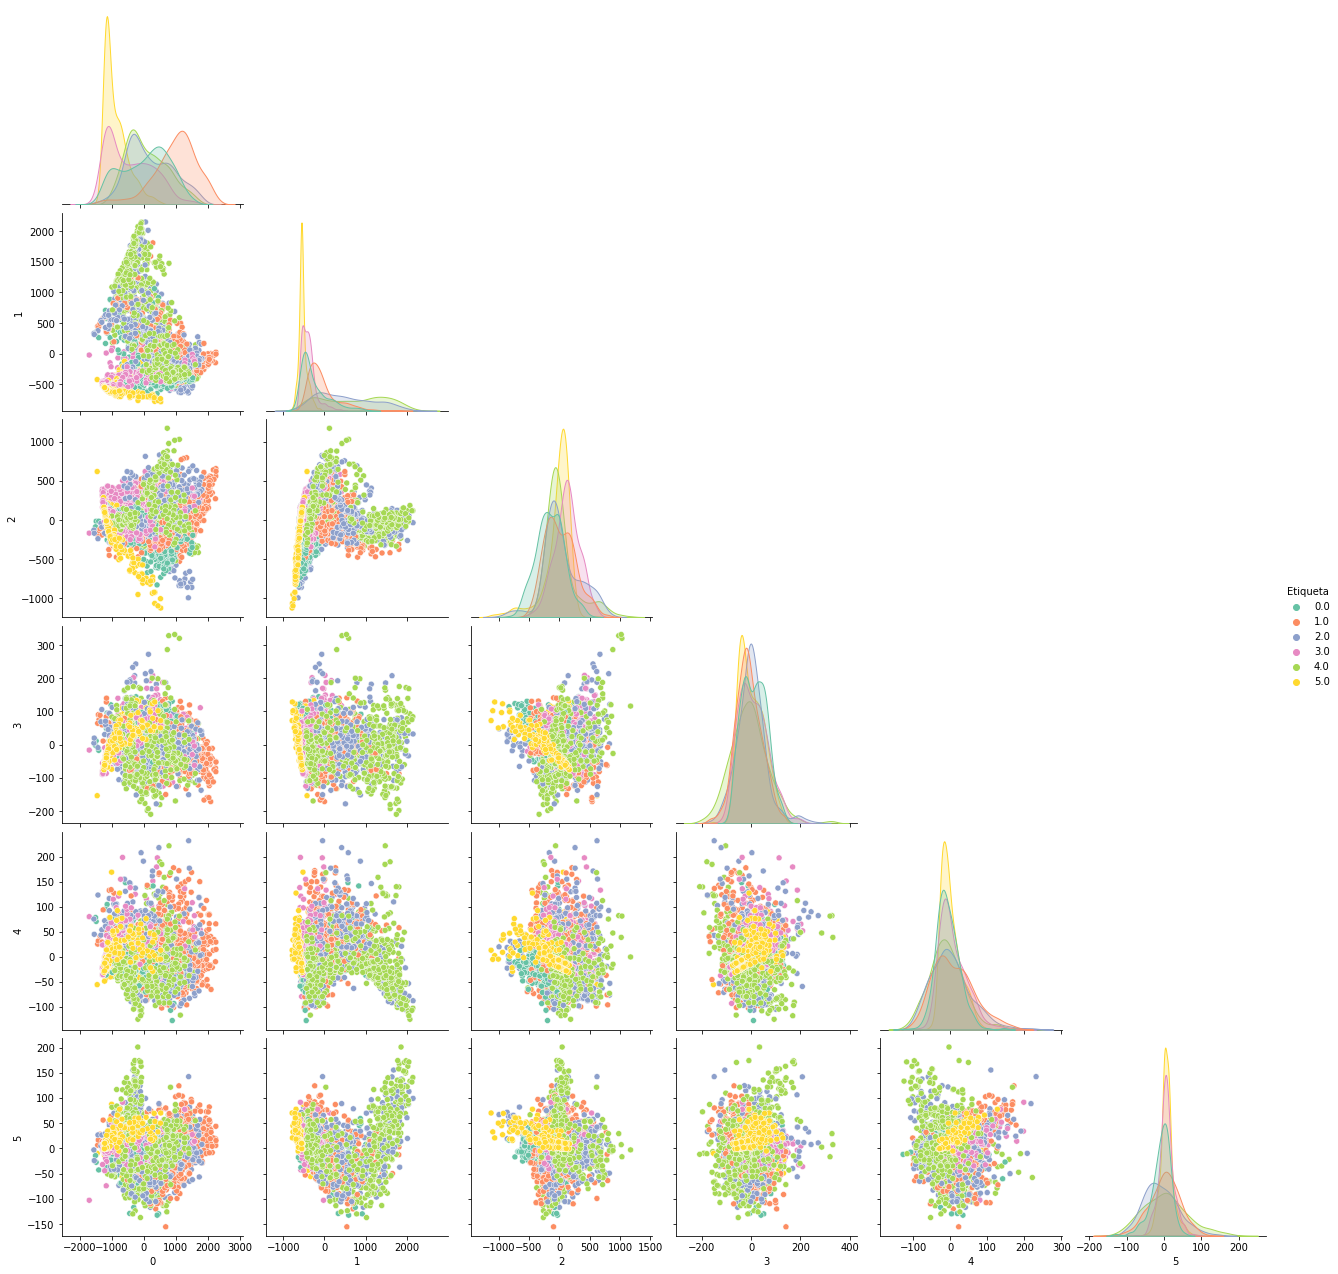

In [ ]:
import seaborn as sns
sns.pairplot(data_Completo, hue='Etiqueta', height=3, palette = sns.color_palette("Set2",6), corner=True)

In [ ]:
pca.fit(X_mejores)
X_pca = pca.fit_transform(X_mejores) # Transformamos los datos al espacio latente
print("original shape:   ", X_mejores.shape)
print("transformed shape:", X_pca.shape)

data_mejores = pd.DataFrame(data=X_pca)
data_mejores['Etiqueta'] = y
data_mejores

original shape:    (3402, 18)
transformed shape: (3402, 6)


,0,1,2,3,4,5,Etiqueta
0,68.903914,-0.081744,-0.003525,0.041316,-0.011199,-0.002818,0.0
1,70.903898,-0.021145,0.008149,0.032216,-0.015739,-0.009255,0.0
2,97.903892,0.006489,0.007738,0.028007,-0.015502,-0.006714,0.0
3,101.903891,0.014939,0.013813,0.023290,-0.016729,-0.010507,0.0
4,132.903889,0.025920,0.007251,0.026196,-0.017921,-0.006514,0.0
...,...,...,...,...,...,...,...
3397,-228.096164,0.155156,0.082178,-0.004861,-0.049166,0.002971,5.0
3398,-112.096150,0.217118,0.168443,-0.001153,-0.026451,0.020354,5.0
3399,-34.096131,0.280806,0.293360,0.002182,0.004089,0.060127,5.0
3400,26.903870,0.336793,0.343693,-0.003702,0.024152,0.090826,5.0


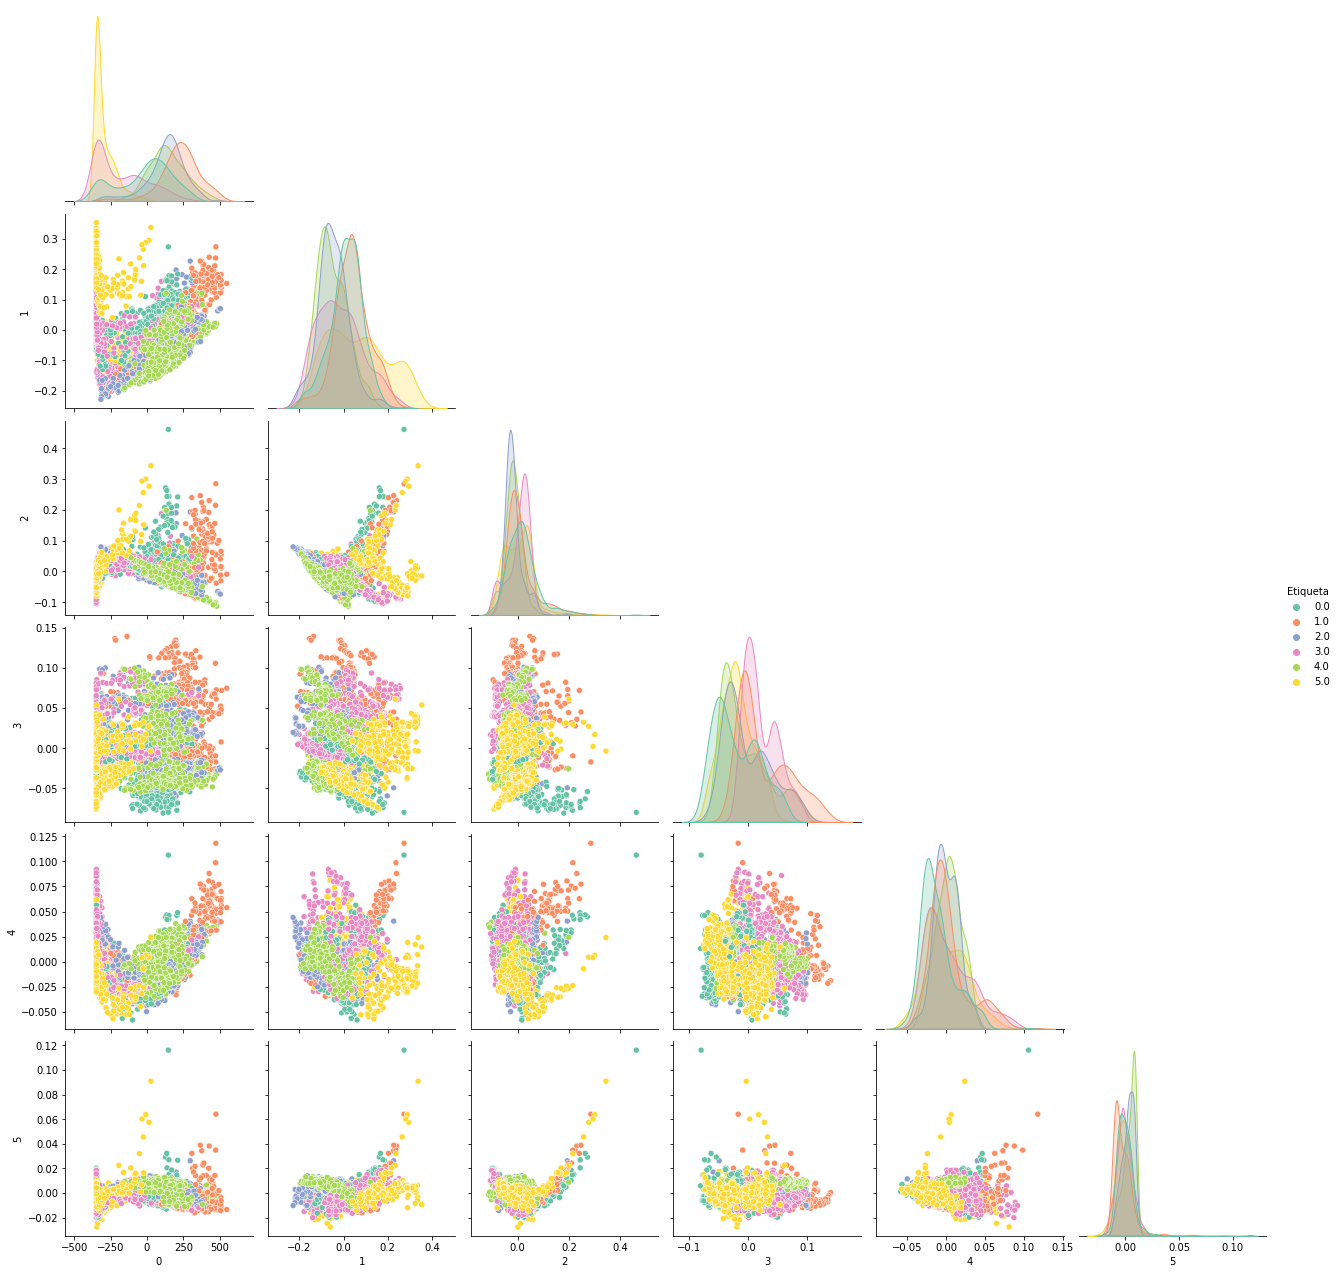

In [ ]:
sns.pairplot(data_mejores, hue='Etiqueta', height=3, palette = sns.color_palette("Set2",6), corner=True)